In [177]:
import pandas as pd
from collections import Counter
from shapely.geometry import Point, MultiPoint
from dateutil import parser
import geopandas as gp
import hdbscan
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [332]:
#import seaborn as sns
#sns.set_context('poster')
#sns.set_color_codes()
lymeData

,text,NLPCat,created_at,date,day,fineLocation,geoType,lat,link1,lon,place,time,tweetType,user_lang,user_screen_name,UTCTime
id,,,,,,,,,,,,,,,,
461673769212207100,A1 #sblchat zero's are for playing tick tack t...,1,Thu May 01 01:09:38 +0000 2014,04-30-14,Wednesday,True,InBox,42.492700,False,-92.342570,"Waterloo, IA, USA",20:38,partial,en,@ATweeter_36cde636f397c81834bb1f3976cb1e077438...,16191.256690
461673974708334500,"Tick, tick, tick...",1,Thu May 01 01:10:27 +0000 2014,04-30-14,Wednesday,True,InBox,40.063960,False,-80.720910,"Wheeling, WV, USA",20:27,partial,en,@ATweeter_26b1e41b93da46a11fd6ed0d19441fb04104...,16191.257257
461684743994884000,"Riley on a trail run. Two large thorns, a tick...",3,Thu May 01 01:53:15 +0000 2014,04-30-14,Wednesday,False,NoCoords,NaN,False,NaN,NaN,20:15,accepted,en,@ATweeter_74dd108408a29f53d36a9f4bb1e5788afbb2...,16191.286979
461702279247458300,I Hate People Who Smack On There Food While Ea...,1,Thu May 01 03:02:56 +0000 2014,04-30-14,Wednesday,True,InBox,33.667660,False,-79.830620,"Kingstree, SC 29556, USA",22:56,accepted,en,@ATweeter_c56d4f168c78f0221322eb72b4ad61272f8c...,16191.335370
461706893459599300,@ATweeter_7cb1dad413ed6bb91745ee426427b42a05aa...,1,Thu May 01 03:21:16 +0000 2014,04-30-14,Wednesday,True,InBox,30.458280,False,-91.140310,"Baton Rouge, LA, USA",22:16,partial,en,@ATweeter_f48f9e7c04fcca12df9289db8647d8958b98...,16191.348102
461708118783569900,Now convinced I have Lyme disease and/or a tic...,4,Thu May 01 03:26:08 +0000 2014,04-30-14,Wednesday,True,InBox,42.655020,False,-86.201980,"Saugatuck, MI, USA",22:08,accepted,en,@ATweeter_ab81bbd062118180ab43f7acd55092693e69...,16191.351481
461708908621348800,"I'm not perfect. I'll annoy you, tick you off ...",3,Thu May 01 03:29:16 +0000 2014,04-30-14,Wednesday,False,NoCoords,NaN,False,NaN,NaN,22:16,accepted,en,@ATweeter_57c9e3ea07ce8ad7df9bc5435a82388dc91e...,16191.353657
461709466896191400,Any lil thing will just tick me off,1,Thu May 01 03:31:29 +0000 2014,04-30-14,Wednesday,True,NoCoords,NaN,False,NaN,NaN,22:29,partial,en,@ATweeter_4aa5b1f468cf11246459bba9cf8e74916bf0...,16191.355197
461710750541942700,I miss not even one week and I miss Worldstar ...,3,Thu May 01 03:36:35 +0000 2014,04-30-14,Wednesday,True,InBox,40.971485,False,-74.021882,"$address Palisade Ave, Emerson, NJ 07630, USA",22:35,accepted,en,@ATweeter_d57359870f94ed075a255d12fb65d15eea03...,16191.358738


In [316]:
lymeTweetFile = "studies/lymeStudy/search/lymeStudy_CollectedTweets.csv"
lymeData = pd.read_csv(lymeTweetFile)
secsPerDay = 60*60*24
lymeData['UTCTime'] = [float(parser.parse(i).strftime("%s"))/secsPerDay for i in lymeData['created_at']]
lymeData = lymeData.set_index(['id'])
biteData = lymeData[lymeData['NLPCat']==3]
biteLocs = lymeData[['lat','lon','UTCTime',]].dropna(how='any')
(lon1,lat1,lon2,lat2) = (-83.68,36.54,-75.23,39.47)
biteLocs = biteLocs[(biteLocs['lat'] > lat1) & 
                   (biteLocs['lat'] < lat2) &
                   (biteLocs['lon'] > lon1) &
                   (biteLocs['lon'] < lon2)]
biteLocs

,lat,lon,UTCTime
id,,,
461720487542796200,37.047890,-80.779790,16191.385613
461785854311424000,38.419240,-82.445100,16191.565984
461799790833958900,39.045750,-76.641270,16191.604444
461836320743387100,39.045750,-76.641270,16191.705255
461836784649777100,38.984600,-77.094700,16191.706528
461839688366837700,39.045750,-76.641270,16191.714537
461842447749099500,39.045750,-76.641270,16191.722153
461862041725054900,37.122360,-76.345770,16191.776227
461870045887725500,38.958630,-77.357000,16191.798310


,lat,lon,UTCTime,label,text
id,,,,,
473628884873670600,39.449500,-75.716320,16224.246528,2,Today's blog is getting to the nitty gritty of...
473655818903375800,38.973966,-83.448263,16224.320845,2,I found one tiny tick and now I'm so utterly d...
473658232230404000,39.045750,-76.641270,16224.327512,2,Just had to pull a tick off my dog #yuck
473660482831011800,39.045750,-76.641270,16224.333715,2,found a tick on my ass
473665505531015100,37.455810,-77.617143,16224.347581,2,If I Gotta Miss The 7-7 Thingy ! Ima Be so Tic...
473666583832043500,36.858640,-82.783240,16224.350556,2,Pulled a tick out of my hair. Not cool.
473674521963405300,39.045750,-76.641270,16224.372465,2,Girls on a diet: I'd probably kill for a cup c...
473703255688495100,39.202280,-83.611500,16224.451748,2,one day... tick tock clock will get picked..
473716879761354700,36.850760,-76.285870,16224.489352,2,Can't believe the difference in #houseprices i...


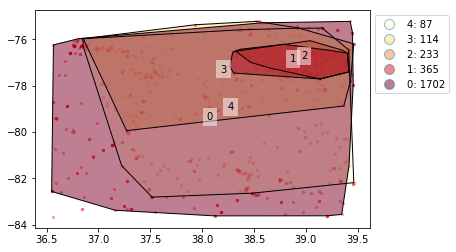

In [351]:
def getClusters(data, kwds,cfg='null'):
    labels = hdbscan.HDBSCAN(**kwds).fit_predict(data)
    return labels
    

def prepClusters(data,labels):
    workData = data
    workData['label'] = labels
    counted = dict(Counter(list(labels)))
    points = []
    hulls = []
    centX = []
    centY = []
    indexOut = []
    counts = []
    
    for (i,j) in sorted(counted.items(), key=lambda x: x[1], reverse=True):
        if i != -1:
            cluster = workData[workData['label'] == i]
            clusterCoords = zip(cluster['lat'],cluster['lon'])
            clusterPoints = MultiPoint([Point(k[0],k[1]) for k in clusterCoords])
            points.append(clusterPoints)
            hulls.append(clusterPoints.convex_hull)
            centroid = hulls[-1].centroid
            centX.append(centroid.x)
            centY.append(centroid.y)
            indexOut.append(i)
            counts.append(j)

    gdf = gp.GeoDataFrame()
    gdf['points'] = points
    gdf['hulls'] = hulls
    gdf['centX'] = centX
    gdf['centY'] = centY
    gdf['keys']= indexOut
    gdf['count'] = counts
    gdf.geometry=gdf['hulls']
    return gdf


def plotClusters(shapes,pts,show=8):
    fig,ax = plt.subplots()
    top9 = shapes.head(n=show).iloc[::-1]
    

    top9.plot(column='count',
              ax=ax,
              cmap='YlOrRd',
              legend=True,
              scheme='QUANTILES',
              k=show,
              alpha=0.5)
    
    if show < 10:
        leg = ax.get_legend()
        for i in reversed(range(show)):
            leg.get_texts()[show-i-1].set_text("%s: %s" % (i,top9['count'][i]))
            plt.text(top9['centX'][i],top9['centY'][i],i,
                     bbox={'facecolor':'white', 'alpha':0.5, 'pad':4, 'edgecolor':'none'})
        leg.set_bbox_to_anchor((1, 1))
    plt.scatter(pts['lat'],pts['lon'],s=5,alpha=0.3,color='r')
    return list(top9.index)


def getTextSubsets(tweets,data,dispKey):
    #textSubSets = {i:pd.merge(data[data['label'] == j],tweets[['text']]) for i,j in dispKey.iteritems()}
    textSubSets = {i:pd.concat([data[data['label'] == j],tweets[['text']]],axis=1,join='inner') for i,j in dispKey.iteritems()}
    return textSubSets
    for i,j in textSubSets.iteritems:
        None
    textSubSets = dict()
    for i,j in dispKey.iteritems():
        dfSub = data[data['label'] == j]
        textSubSets[i] = dfSub
    return textSubSets
    

def runClusters(tweets,data,cfg=dict(),kwds=dict(),show=9):
    if 'min_cluster_size' not in kwds.keys():
        kwds['min_cluster_size'] = int(len(data)*0.01)
        kwds['min_samples'] = max(kwds['min_cluster_size']/5,2)
    
    labels = getClusters(data, kwds)
    shapes = prepClusters(data,labels)
    data['label'] = labels
    
    show = min(show,len(shapes))+1
    show -= 1
    
    indices = plotClusters(shapes,data,show=show)
    dispKey = {shapes.index[i]:shapes['keys'][i] for i in range(show)}
    textChunks = getTextSubsets(tweets,data,dispKey)
    return textChunks
    
    plt.show()
    print indices
    return shapes

runClusters(lymeData,biteLocs,kwds={'metric':'manhattan'},show=5)[0]